In [2]:
%matplotlib inline                      

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import misc

In [3]:
pic_face = misc.imread('/home/slou/Documents/M2/semestre1/ML_project/pictures_train/1.jpg')
type(pic_face)      
pic_face.shape, pic_face.dtype

((1024, 768, 3), dtype('uint8'))

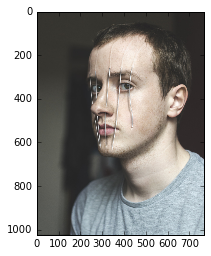

In [4]:
plt.imshow(pic_face)

Features :
    background impact : 
    angle impact :
        given by angle feature
    position impact :
        using rule of the third, each picture split in 9 cases according to their size, we could use each of this case as a feature. Use the face detection and position of the face features to create another feature to say in which cases it is. Try of this after
    sharpness impact : determining sharpnesse using contrast ?
    exposure impact : 
    expression impact : using the expression feature but maybe need to compute with other feature such as colors (colorful = joy ?)
    
    
    
    Data features are given in % not in absolute

In [5]:
pic_features = pd.read_csv('facial_features_train.csv')

In [6]:
pic_features.iloc[0]

ID                                           1
detection score                        0.98914
x0                                     0.28637
y0                                    0.194149
width                                   0.5866
height                                0.437185
left_eye_x                            0.352257
left_eye_y                            0.342082
right_eye_x                           0.528909
right_eye_y                           0.334524
left_of_left_eyebrow_x                0.301341
left_of_left_eyebrow_y                0.300882
right_of_left_eyebrow_x                0.36293
right_of_left_eyebrow_y               0.296558
left_of_right_eyebrow_x               0.446798
left_of_right_eyebrow_y               0.294219
right_of_right_eyebrow_x              0.607825
right_of_right_eyebrow_y              0.302685
midpoint_between_eyes_x               0.400697
midpoint_between_eyes_y               0.329646
nose_tip_x                            0.343814
nose_tip_y   

In [10]:
x_selection_position = pic_features.ix[:,'x0':'right_eye_y']
y_position_impact =pic_features[["position_impact_p", "position_impact_n"]].sum(axis=1)

In [11]:
y_position_impact.head()

0    0.000000
1    0.285714
2    0.333333
3   -0.166667
4    0.000000
dtype: float64

In [16]:
list(x_selection_position)
#compute middle of face 
x_selection_position['middle_x'] = x_selection_position['x0'] + x_selection_position['width']/2
x_selection_position['middle_y'] = x_selection_position['y0'] + x_selection_position['height']/2

#compute distance from the first third point
#sqrt((x2 - x1)**2 + (y2 - y1)**2 )
#math.hypot(x2 - x1, y2 - y1)

#A third (0.33,0.33)
x_selection_position['distance_x_a'] = abs(x_selection_position['middle_x'] - 0.33)
x_selection_position['distance_y_a'] = abs(x_selection_position['middle_y'] - 0.33)

#B third (0.67, 0.33)
x_selection_position['distance_x_b'] = abs(x_selection_position['middle_x'] - 0.67)
x_selection_position['distance_y_b'] = abs(x_selection_position['middle_y'] - 0.33)

#C third (O.33, 0.67)
x_selection_position['distance_x_c'] = abs(x_selection_position['middle_x'] - 0.33)
x_selection_position['distance_y_c'] = abs(x_selection_position['middle_y'] - 0.67)

#D third (0.67, 0.67)
x_selection_position['distance_x_d'] = abs(x_selection_position['middle_x'] - 0.67)
x_selection_position['distance_y_d'] = abs(x_selection_position['middle_y'] - 0.67)

#Eyes position distance to the top third
#A third (0.33,0.33)
#x_selection_position['left_eye_a'] = math.sqrt(x_selection_position['left_eye_x'] - 0.33, x_selection_position['left_eye_y'] - 0.33])

#B third (0.67, 0.33)
#x_selection_position['right_eye_b'] = abs(x_selection_position['middle_x'] - 0.67)

x_selection_position.head()

,x0,y0,width,height,left_eye_x,left_eye_y,right_eye_x,right_eye_y,middle_x,middle_y,distance_x_a,distance_y_a,distance_x_b,distance_y_b,distance_x_c,distance_y_c,distance_x_d,distance_y_d
0,0.286370,0.194149,0.586600,0.437185,0.352257,0.342082,0.528909,0.334524,0.579670,0.412742,0.249670,0.082742,0.090330,0.082742,0.249670,0.257258,0.090330,0.257258
1,0.622779,0.104573,0.319961,0.479114,0.721203,0.248519,0.859511,0.250956,0.782759,0.344129,0.452759,0.014129,0.112759,0.014129,0.452759,0.325871,0.112759,0.325871
2,0.141922,0.224155,0.418156,0.549069,0.278366,0.419830,0.445683,0.364625,0.351000,0.498689,0.021000,0.168689,0.319000,0.168689,0.021000,0.171311,0.319000,0.171311
3,0.499818,0.382715,0.485564,0.551305,0.656774,0.516767,0.847100,0.584977,0.742600,0.658367,0.412600,0.328367,0.072600,0.328367,0.412600,0.011633,0.072600,0.011633
4,0.275462,0.301032,0.440068,0.315859,0.383386,0.393272,0.560128,0.401940,0.495496,0.458961,0.165496,0.128961,0.174504,0.128961,0.165496,0.211039,0.174504,0.211039


In [35]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_selection_position, y_position_impact, train_size=0.8, random_state=0)
print("Nb d'échantillons d'apprentissage :  {}".format(X_train.shape[0]))
print("Nb d'échantillons de validation :    {}".format(X_test.shape[0]))

Nb d'échantillons d'apprentissage :  8000
Nb d'échantillons de validation :    2000


In [36]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
               
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)  

# Chargement d'une mesure standard de performance
from sklearn.metrics import mean_squared_error

# accuracy : mean square error
print("Accuracy       : ", mean_squared_error(y_test, y_pred))


Accuracy       :  0.0392300850051
